<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<h3>Importing Data</h3>


In [2]:
data=pd.read_csv('Yourcabs.csv')

In [3]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
data.shape

(43431, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

<h3>Feature engineering</h3>


In [6]:
# We are dropping user_id because it is personal information identifier
data=data.drop(['id','user_id'],axis=1)

In [7]:
data.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [8]:
data.vehicle_model_id.nunique()

27

In [9]:
data.vehicle_model_id.value_counts()

vehicle_model_id
12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

In [10]:
#here model id 12 repeating 31859 times it will create a bias , 
data['is_vmid_12']=pd.get_dummies(data.vehicle_model_id.astype('object'))[12].astype('int')
#Now we can remove vehicle modle id 
data=data.drop('vehicle_model_id',axis=1)

In [11]:
data.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
0,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0
1,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1
2,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1
3,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1
4,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1


In [12]:
data.travel_type_id	.value_counts()

travel_type_id
2    34292
3     7550
1     1589
Name: count, dtype: int64

<h3>Dividing the dataset into 3 parts based on the travel type</h3>


In [13]:
#We are dividing because each travel type behave differently 1 is long distance , 2 is point to point 3 is hourly rental
df_travel_type1=data.loc[data.travel_type_id==1]
df_travel_type1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
6,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0,1.0,1
17,NaN,1,1383.0,NaN,NaN,32.0,1/12/2013 8:00,41288.00000,1,0,1/1/2013 12:17,12.930451,77.685822,NaN,NaN,0,1.0,0
24,NaN,1,515.0,NaN,15.0,32.0,1/5/2013 8:30,41279.00000,0,0,1/1/2013 14:40,12.978960,77.673450,NaN,NaN,0,1.0,0
158,NaN,1,136.0,NaN,1.0,152.0,1/4/2013 9:30,41278.39583,1,0,1/3/2013 12:19,12.907960,77.624180,NaN,NaN,0,1.0,0
216,NaN,1,1118.0,NaN,NaN,32.0,1/6/2013 7:30,41280.00000,1,0,1/4/2013 9:32,12.930220,77.560390,NaN,NaN,0,1.0,0


In [14]:
df_travel_type2=data.loc[data.travel_type_id==2]
df_travel_type2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
0,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0
1,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1
2,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1
3,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1
4,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1


In [15]:
df_travel_type3=data.loc[data.travel_type_id==3]
df_travel_type3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
8,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0,1.0,0
20,2.0,3,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,0,0,1/1/2013 12:52,13.018540,77.635240,NaN,NaN,0,1.0,0
23,1.0,3,1286.0,NaN,NaN,NaN,1/1/2013 16:30,NaN,0,0,1/1/2013 14:39,12.973448,77.620320,NaN,NaN,0,1.0,1
34,1.0,3,1323.0,NaN,NaN,NaN,1/1/2013 20:00,41275.0,1,0,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0,1.0,1
47,2.0,3,142.0,NaN,NaN,NaN,1/2/2013 3:00,NaN,0,0,1/1/2013 19:37,12.912810,77.609230,NaN,NaN,0,1.0,1


 <h3>Feature Engineering Travel Type Id 1</h3>

In [16]:
df_travel_type1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           0 non-null      float64
 1   travel_type_id       1589 non-null   int64  
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   to_date              1504 non-null   float64
 8   online_booking       1589 non-null   int64  
 9   mobile_site_booking  1589 non-null   int64  
 10  booking_created      1589 non-null   object 
 11  from_lat             1496 non-null   float64
 12  from_long            1496 non-null   float64
 13  to_lat               1 non-null      float64
 14  to_long              1 non-null      float64
 15  Car_Cancellation     1589 non-null   int64

In [17]:
#We dont want travel ID , package id, to area id , from lat, from lang to lat , to lang
df_travel_type1=df_travel_type1.drop(['package_id','to_area_id','travel_type_id','from_lat','to_date','from_long','Cost_of_error','to_lat','to_long'],axis=1)

In [18]:
df_travel_type1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
 8   is_vmid_12           1589 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 117.9+ KB


In [19]:
df_travel_type1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
is_vmid_12               0
dtype: int64

In [20]:
#converting id's to categorical data
df_travel_type1.from_area_id=df_travel_type1.from_area_id.astype('object')
df_travel_type1.from_city_id=df_travel_type1.from_city_id.astype('object')
df_travel_type1.to_city_id=df_travel_type1.to_city_id.astype('object')
df_travel_type1.from_date=pd.to_datetime(df_travel_type1.from_date,format='mixed')
df_travel_type1.booking_created=pd.to_datetime(df_travel_type1.booking_created,format='mixed')
df_travel_type1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
 8   is_vmid_12           1589 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(3)
memory usage: 117.9+ KB


In [21]:
df_travel_type1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
is_vmid_12               0
dtype: int64

In [22]:
df_travel_type1.describe(include=['object'])

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [23]:
#We are filling missing values with mode
df_travel_type1['from_area_id']=df_travel_type1['from_area_id'].fillna(value='393')
df_travel_type1['from_city_id']=df_travel_type1['from_city_id'].fillna(value='15')
df_travel_type1['to_city_id']=df_travel_type1['to_city_id'].fillna(value='32')

In [24]:
df_travel_type1.isnull().sum()

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_vmid_12             0
dtype: int64

In [25]:
#Categorizing from_are_id into high , medium , low , zero cancellations 
from_area_id_cancel_percentage=df_travel_type1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
df_travel_type1['from_area_id_cancel_percentage']=df_travel_type1.from_area_id.map(from_area_id_cancel_percentage)

In [26]:
df_travel_type1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_percentage
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408
17,1383.0,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000
216,1118.0,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000


In [27]:
df_travel_type1['from_area_id_cancel_Level']=np.where(df_travel_type1.from_area_id_cancel_percentage>=0.67, "High",
                                                   np.where(df_travel_type1.from_area_id_cancel_percentage==0.00, "Zero",
                                                   np.where(df_travel_type1.from_area_id_cancel_percentage<=0.34, "Low","Medium")))

In [28]:
df_travel_type1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_percentage,from_area_id_cancel_Level
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408,Low
17,1383.0,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000,Zero
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000,Zero
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000,Zero
216,1118.0,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000,Zero


In [29]:
#We can remove percentage and from area id
df_travel_type1=df_travel_type1.drop(['from_area_id_cancel_percentage','from_area_id'],axis=1)

In [30]:
df_travel_type1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low
17,15,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero
216,15,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero


In [31]:
#We will create route based on from city to to city
df_travel_type1.from_city_id=df_travel_type1.from_city_id.astype('int')
df_travel_type1.to_city_id=df_travel_type1.to_city_id.astype('int')

In [32]:
df_travel_type1['city_route']=df_travel_type1.from_city_id.astype('str')+'->'+df_travel_type1.to_city_id.astype('str')
df_travel_type1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,city_route
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,15->108
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,15->32
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,15->32
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,1->152
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,15->32


In [33]:
#We will create cancellation percentage based on the routes here 
from_route_cancel_percentage=df_travel_type1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
df_travel_type1['from_route_cancel_percentage']=df_travel_type1.city_route.map(from_route_cancel_percentage)

In [34]:
df_travel_type1['from_city_route_cancel_Level']=np.where(df_travel_type1.from_route_cancel_percentage>=0.67, "High",
                                                   np.where(df_travel_type1.from_route_cancel_percentage==0.00, "Zero",
                                                   np.where(df_travel_type1.from_route_cancel_percentage<=0.34, "Low","Medium")))

In [35]:
df_travel_type1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,city_route,from_route_cancel_percentage,from_city_route_cancel_Level
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,15->108,0.016129,Low
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,15->32,0.017937,Low
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,15->32,0.017937,Low
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,1->152,0.000000,Zero
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,15->32,0.017937,Low


In [36]:
df_travel_type1=df_travel_type1.drop(['from_route_cancel_percentage','from_city_id','to_city_id','city_route'],axis=1)

In [37]:
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low


In [38]:
df_travel_type1['month']=df_travel_type1.from_date.dt.month
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1


In [39]:
df_travel_type1['day_of_week']=df_travel_type1.from_date.dt.dayofweek # monday=0 sunday=6
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6


In [40]:
#We can add weekend booking or weekday booking 
df_travel_type1['is_weekend']=(df_travel_type1['day_of_week']>=5).astype('int')
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1


In [41]:
df_travel_type1['hour_of_day']=df_travel_type1.from_date.dt.hour
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend,hour_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7


In [42]:
df_travel_type1["time_of_day"]=pd.cut(df_travel_type1['hour_of_day'],bins=[0,6,12,18,24],labels=["Night","Morning","Afternoon","Evening"])
df_travel_type1.head()                            

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend,hour_of_day,time_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning


In [43]:
df_travel_type1['time_diff']=(df_travel_type1.from_date-df_travel_type1.booking_created).dt.total_seconds()/3600
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning,45.966667


<Axes: >

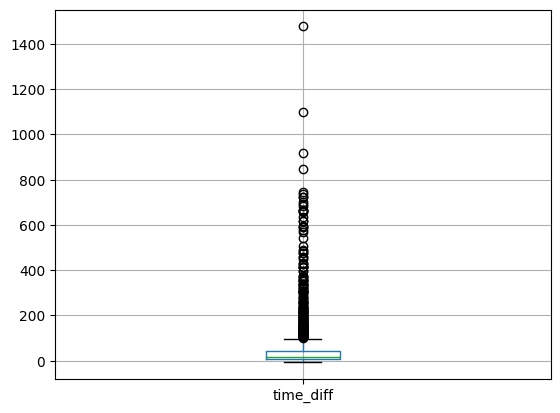

In [44]:
#Checking outliers in time difference
df_travel_type1.boxplot('time_diff')

In [45]:
Q1=df_travel_type1['time_diff'].quantile(0.25)
Q3=df_travel_type1['time_diff'].quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
outlier_count=df_travel_type1[df_travel_type1['time_diff']>UL].shape[0]
outlier_perc=(outlier_count*100)/df_travel_type1.shape[0]
#calculating outlier percentage upper limit and lower limit
outlier_count_upl=df_travel_type1[df_travel_type1['time_diff']>UL].shape[0]
outlier_per_ul=(outlier_count_upl*100)/df_travel_type1.shape[0]
outlier_count_ll=df_travel_type1[df_travel_type1['time_diff']<LL].shape[0]
outlier_per_ll=(outlier_count_ll*100)/df_travel_type1.shape[0]
print(f"Q1:{Q1} |Q3:{Q3}|IQR:{IQR}|LL:{LL}|UL:{UL}|NUMBER OF OUTLIERS :{outlier_count}|% OF OUTLIERS:{outlier_perc}")
print(f"# of outliers on the Higher side: {outlier_count_upl} | % of outliers on the Higher side : {outlier_per_ul}%")
print(f"# of outliers on the lower side: {outlier_count_ll} | % of outliers on the lower side : {outlier_per_ll}%")

Q1:9.05 |Q3:44.55|IQR:35.5|LL:-44.2|UL:97.8|NUMBER OF OUTLIERS :219|% OF OUTLIERS:13.782252989301448
# of outliers on the Higher side: 219 | % of outliers on the Higher side : 13.782252989301448%
# of outliers on the lower side: 0 | % of outliers on the lower side : 0.0%


In [46]:
#since >13% of the rows are outliers , we will create categories , rather than replacing with one value
#Clculating 5 number summary
df_travel_type1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [47]:
#From above we can say that from -7 to 9.05 the bookings are done in urgency , from 9 to 16 we can say it as same day booking 
# from 16 to 44 we can say it is regular booking from 44 to 1477 it is said as advance booking 
df_travel_type1['booking_nature']=pd.cut(df_travel_type1['time_diff'],bins=[-8,2,17,45,1500],labels=["Urgent","SameDay","Regular","Advance"])
df_travel_type1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning,0.400000,Urgent
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning,259.716667,Advance
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning,89.833333,Advance
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning,21.183333,Regular
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning,45.966667,Advance


In [48]:
#We dont need from_date,booking_created,hour_of_day,time_diff
df_travel_type1=df_travel_type1.drop(["from_date","booking_created","hour_of_day","time_diff"],axis=1)
df_travel_type1.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_vmid_12,from_area_id_cancel_Level,from_city_route_cancel_Level,month,day_of_week,is_weekend,time_of_day,booking_nature
6,0,0,0,1,Low,Low,1,1,0,Morning,Urgent
17,1,0,0,0,Zero,Low,1,5,1,Morning,Advance
24,0,0,0,0,Zero,Low,1,5,1,Morning,Advance
158,1,0,0,0,Zero,Zero,1,4,0,Morning,Regular
216,1,0,0,0,Zero,Low,1,6,1,Morning,Advance


In [49]:
#Lets re order all the columns
df_travel_type1=df_travel_type1[["from_area_id_cancel_Level","from_city_route_cancel_Level","booking_nature","time_of_day","is_weekend","day_of_week","month","is_vmid_12","online_booking","mobile_site_booking","Car_Cancellation"]]
df_travel_type1

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,is_weekend,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,0,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,1,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,1,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,0,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,1,6,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43342,Low,Low,SameDay,Evening,1,5,11,1,1,0,0
43385,Zero,Low,Advance,Afternoon,0,4,11,0,1,0,0
43386,Zero,Low,SameDay,Morning,1,6,11,1,1,0,0
43393,Low,Zero,SameDay,Morning,1,6,11,1,0,0,0


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

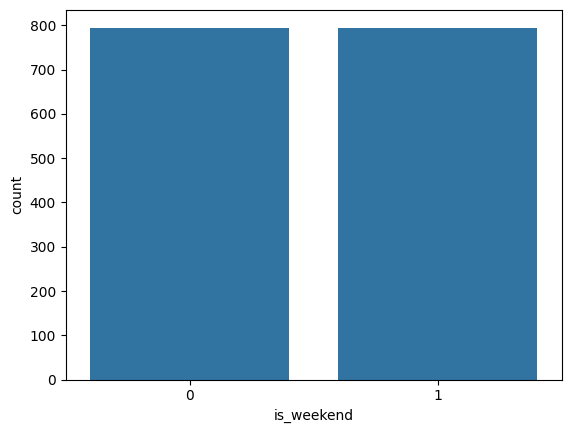

In [51]:
sns.countplot(x="is_weekend",data=df_travel_type1)
plt.show()
#the booking volume is almost the same on weekdays and weekends

<Axes: xlabel='is_weekend', ylabel='count'>

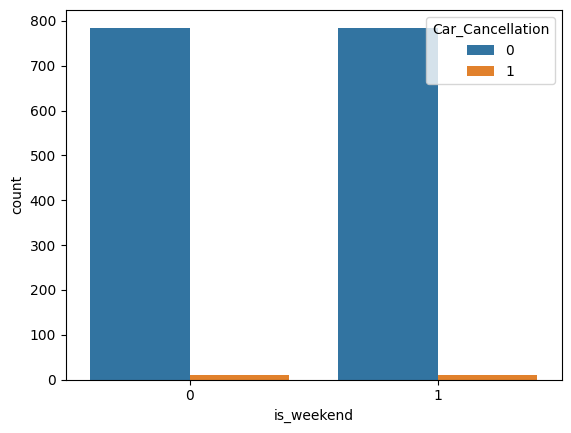

In [52]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_travel_type1)
#The cancellation volume is almost same on weekdays and weekends

In [53]:
#From here we can make conclusion , there is no much information in weekend for cancelation behaviour
df_travel_type1=df_travel_type1.drop('is_weekend',axis=1)
df_travel_type1.head()

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,6,1,0,1,0,0


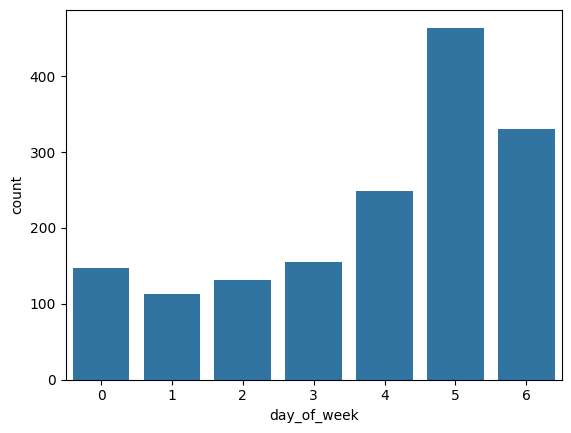

In [54]:
sns.countplot(x="day_of_week",data=df_travel_type1)
plt.show()

<Axes: xlabel='day_of_week', ylabel='count'>

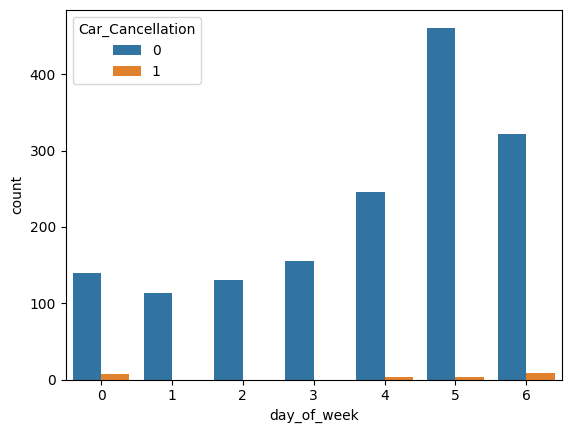

In [55]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_travel_type1)

In [56]:
#From here we can say tue, wed thur we don't have cancellations, but friday, sat, sun,mon -- more cancellations

<Axes: xlabel='day_of_week', ylabel='count'>

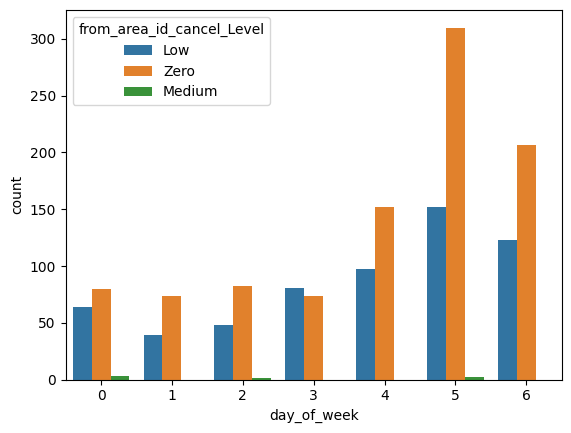

In [57]:
sns.countplot(x='day_of_week',hue='from_area_id_cancel_Level',data=df_travel_type1)

<Axes: xlabel='day_of_week', ylabel='count'>

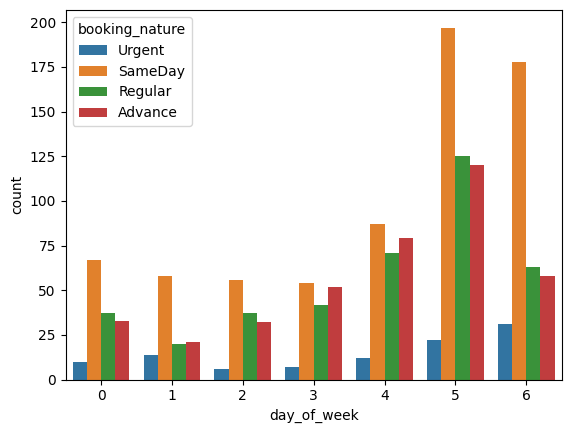

In [58]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_travel_type1)

<Axes: xlabel='booking_nature', ylabel='count'>

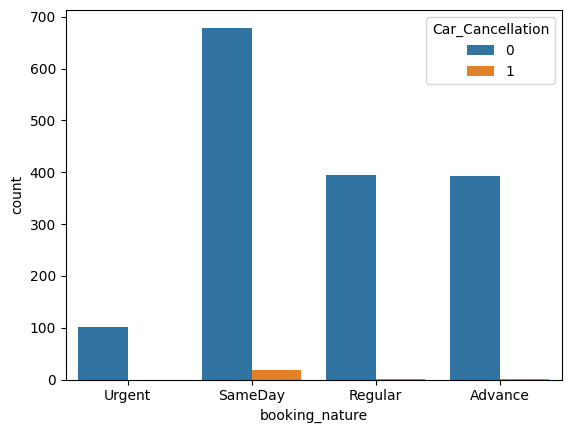

In [59]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_travel_type1)

In [60]:
#most cancellations are happening in same day booking

In [61]:
df_travel_type1.head()

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking,Car_Cancellation
6,Low,Low,Urgent,Morning,1,1,1,0,0,0
17,Zero,Low,Advance,Morning,5,1,0,1,0,0
24,Zero,Low,Advance,Morning,5,1,0,0,0,0
158,Zero,Zero,Regular,Morning,4,1,0,1,0,0
216,Zero,Low,Advance,Morning,6,1,0,1,0,0


In [62]:
df_travel_type1.from_area_id_cancel_Level=df_travel_type1.from_area_id_cancel_Level.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_travel_type1.from_city_route_cancel_Level=df_travel_type1.from_city_route_cancel_Level.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_travel_type1.booking_nature=df_travel_type1.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_travel_type1.time_of_day=df_travel_type1.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_travel_type1.head()

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking,Car_Cancellation
6,2,2,1,1,1,1,1,0,0,0
17,1,2,4,1,5,1,0,1,0,0
24,1,2,4,1,5,1,0,0,0,0
158,1,1,3,1,4,1,0,1,0,0
216,1,2,4,1,6,1,0,1,0,0


In [63]:
#All the columns are encoded

<h3>MACHINE LEARNING</h3>

In [64]:
X=df_travel_type1.drop('Car_Cancellation',axis=1)
y=df_travel_type1['Car_Cancellation']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [67]:
X_train.head()

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking
8593,1,2,2,4,0,4,1,0,0
2839,2,1,2,4,3,1,1,1,0
13600,1,1,2,2,1,5,0,0,0
16560,2,2,2,4,0,6,1,1,0
14961,1,1,4,1,5,6,0,1,0


In [68]:
y_train.head()

8593     0
2839     0
13600    0
16560    0
14961    0
Name: Car_Cancellation, dtype: int64

<h3>Decision Tree Model</h3>

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model=DecisionTreeClassifier()

In [71]:
model.fit(X_train,y_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


DecisionTreeClassifier()

In [72]:
ytrain_pred=model.predict(X_train)
ytest_pred=model.predict(X_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [73]:
from sklearn import metrics

In [74]:
print(metrics.classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      0.72      0.84        18

    accuracy                           1.00      1271
   macro avg       1.00      0.86      0.92      1271
weighted avg       1.00      1.00      1.00      1271



In [75]:
print(metrics.classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       315
           1       0.33      0.33      0.33         3

    accuracy                           0.99       318
   macro avg       0.66      0.66      0.66       318
weighted avg       0.99      0.99      0.99       318



<h2>Naive Bayes Classifier</h2>

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
nb_model=GaussianNB()

In [78]:
nb_model.fit(X_train,y_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


GaussianNB()

In [79]:
y_train_pred=nb_model.predict(X_train)
y_test_pred=nb_model.predict(X_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [80]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09      1253
           1       0.01      1.00      0.03        18

    accuracy                           0.06      1271
   macro avg       0.51      0.52      0.06      1271
weighted avg       0.99      0.06      0.09      1271



In [81]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       315
           1       0.01      1.00      0.02         3

    accuracy                           0.05       318
   macro avg       0.50      0.52      0.05       318
weighted avg       0.99      0.05      0.07       318



<h2> Random Forest</h2>

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RF_model=RandomForestClassifier()

In [84]:
RF_model.fit(X_train,y_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


RandomForestClassifier()

In [85]:
y_train_predrf=RF_model.predict(X_train)
y_test_predrf=RF_model.predict(X_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [86]:
print(metrics.classification_report(y_train,y_train_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       0.84      0.89      0.86        18

    accuracy                           1.00      1271
   macro avg       0.92      0.94      0.93      1271
weighted avg       1.00      1.00      1.00      1271



In [87]:
print(metrics.classification_report(y_test,y_test_predrf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       0.00      0.00      0.00         3

    accuracy                           0.99       318
   macro avg       0.50      0.50      0.50       318
weighted avg       0.98      0.99      0.99       318



C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

<h2> CONCLUSION</h2>

<h3> For travel type ID 1 , we can choose to deploy decision tree model , Since it is giving same results and less complex to store and understand</h3>

<h2>Feature Engineering Travel Type Id 2</h2>

In [88]:
df_travel_type2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
0,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0
1,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1
2,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1
3,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1
4,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1


In [89]:
#We dont want travel_type_id , because all are same values
df_travel_type2=df_travel_type2.drop('travel_type_id',axis=1)

In [90]:
df_travel_type2.head(1)

,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
0,NaN,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,1.0,0


In [91]:
#dropping packageid beacuase it contains all null values 
df_travel_type2=df_travel_type2.drop('package_id',axis=1)

In [92]:
df_travel_type2.head(1) 

,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
0,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,1.0,0


In [93]:
df_travel_type2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   from_city_id         14504 non-null  float64
 3   to_city_id           0 non-null      float64
 4   from_date            34292 non-null  object 
 5   to_date              19107 non-null  float64
 6   online_booking       34292 non-null  int64  
 7   mobile_site_booking  34292 non-null  int64  
 8   booking_created      34292 non-null  object 
 9   from_lat             34292 non-null  float64
 10  from_long            34292 non-null  float64
 11  to_lat               34292 non-null  float64
 12  to_long              34292 non-null  float64
 13  Car_Cancellation     34292 non-null  int64  
 14  Cost_of_error        34292 non-null  float64
 15  is_vmid_12           34292 non-null  int3

In [94]:
df_travel_type2.from_area_id=df_travel_type2.from_area_id.astype('object')
df_travel_type2.to_area_id=df_travel_type2.to_area_id.astype('object')

In [95]:
df_travel_type2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  object 
 1   to_area_id           34292 non-null  object 
 2   from_city_id         14504 non-null  float64
 3   to_city_id           0 non-null      float64
 4   from_date            34292 non-null  object 
 5   to_date              19107 non-null  float64
 6   online_booking       34292 non-null  int64  
 7   mobile_site_booking  34292 non-null  int64  
 8   booking_created      34292 non-null  object 
 9   from_lat             34292 non-null  float64
 10  from_long            34292 non-null  float64
 11  to_lat               34292 non-null  float64
 12  to_long              34292 non-null  float64
 13  Car_Cancellation     34292 non-null  int64  
 14  Cost_of_error        34292 non-null  float64
 15  is_vmid_12           34292 non-null  int3

In [96]:
 df_travel_type2['area_route']=df_travel_type2.from_area_id.astype('str')+'-->'+df_travel_type2.to_area_id.astype('str')

In [97]:
 df_travel_type2.head()

,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12,area_route
0,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0,83.0-->448.0
1,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1,1010.0-->540.0
2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1,1301.0-->1034.0
3,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1,768.0-->398.0
4,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1,1365.0-->849.0


In [98]:
route_cancellation_percentage=df_travel_type2[['area_route','Car_Cancellation']].groupby('area_route').mean()['Car_Cancellation']

In [99]:
print(route_cancellation_percentage)

area_route
1004.0-->168.0     0.00
1005.0-->1069.0    0.25
1005.0-->1070.0    0.00
1005.0-->1102.0    0.00
1005.0-->1192.0    1.00
                   ... 
995.0-->1333.0     0.00
995.0-->142.0      0.00
995.0-->393.0      0.00
995.0-->571.0      0.00
995.0-->768.0      1.00
Name: Car_Cancellation, Length: 11249, dtype: float64


In [100]:
df_travel_type2['route_cancel_percentage']=df_travel_type2.area_route.map(route_cancellation_percentage)

In [101]:
df_travel_type2.head()

,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12,area_route,route_cancel_percentage
0,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0,83.0-->448.0,0.0
1,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1,1010.0-->540.0,0.0
2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1,1301.0-->1034.0,0.0
3,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1,768.0-->398.0,0.0
4,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1,1365.0-->849.0,0.0


In [102]:
#we will group route cancel percentage into zero, low, medium high
df_travel_type2['route_cancel_Level']=np.where(df_travel_type2.route_cancel_percentage>=0.67, "High",
                                                   np.where(df_travel_type2.route_cancel_percentage==0.00, "Zero",
                                                   np.where(df_travel_type2.route_cancel_percentage<=0.34, "Low","Medium")))

In [103]:
df_travel_type2.head()

,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12,area_route,route_cancel_percentage,route_cancel_Level
0,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0,0,83.0-->448.0,0.0,Zero
1,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0,1,1010.0-->540.0,0.0,Zero
2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0,1,1301.0-->1034.0,0.0,Zero
3,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0,1,768.0-->398.0,0.0,Zero
4,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0,1,1365.0-->849.0,0.0,Zero


In [104]:
df_travel_type2.route_cancel_Level.unique()

array(['Zero', 'Low', 'High', 'Medium'], dtype=object)

In [105]:
#now we dont need from area , to area, area route and route cancel percentage
df_travel_type2=df_travel_type2.drop(["from_area_id","to_area_id","area_route","route_cancel_percentage",'Cost_of_error'],axis=1)

In [106]:
df_travel_type2.head()

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level
0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,0,Zero
1,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1,Zero
2,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1,Zero
3,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1,Zero
4,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1,Zero


In [107]:
df_travel_type2.from_date=pd.to_datetime(df_travel_type2.from_date,format='mixed')

In [108]:
df_travel_type2['month']=df_travel_type2.from_date.dt.month
df_travel_type2.head()

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1
1,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1
2,NaN,NaN,2013-01-01 03:30:00,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1
3,NaN,NaN,2013-01-01 05:45:00,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1
4,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1


In [109]:
df_travel_type2["day_of_week"]=df_travel_type2.from_date.dt.dayofweek

In [110]:
df_travel_type2.head(2)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,0,Zero,1,1
1,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 2:25,12.96691,77.74935,12.92768,77.62664,0,1,Zero,1,1


In [111]:
df_travel_type2['hour_of_day']=df_travel_type2.from_date.dt.hour

In [112]:
df_travel_type2.head(2)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,hour_of_day
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,0,Zero,1,1,2
1,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 2:25,12.96691,77.74935,12.92768,77.62664,0,1,Zero,1,1,9


In [113]:
df_travel_type2["time_of_day"]=pd.cut(df_travel_type2["hour_of_day"],bins=[0,6,12,18,24],labels=["Night","Morning","Afternoon","Evening"])

In [114]:
df_travel_type2.head(1)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,hour_of_day,time_of_day
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,0,Zero,1,1,2,Night


In [115]:
df_travel_type2.booking_created=pd.to_datetime(df_travel_type2.booking_created,format='mixed')

In [116]:
df_travel_type2["time_diff"]=(df_travel_type2.from_date-df_travel_type2.booking_created).dt.total_seconds()/3600
df_travel_type2.head(1)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,hour_of_day,time_of_day,time_diff
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,0,Zero,1,1,2,Night,0.35


In [117]:
df_travel_type2["time_diff"].describe()

count    34292.000000
mean        37.202130
std        100.917727
min        -22.900000
25%          3.183333
50%          8.833333
75%         19.166667
max       1906.900000
Name: time_diff, dtype: float64

In [118]:
df_travel_type2['booking_nature']=pd.cut(df_travel_type2['time_diff'],bins=[-23,2,9,20,1907],labels=["Urgent","SameDay","Regular","Advance"])
df_travel_type2.head(1)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,hour_of_day,time_of_day,time_diff,booking_nature
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,0,Zero,1,1,2,Night,0.35,Urgent


In [119]:
df_travel_type2["is_weekend"]=(df_travel_type2["day_of_week"]>=5).astype('int')
df_travel_type2.head(1)

,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,...,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,hour_of_day,time_of_day,time_diff,booking_nature,is_weekend
0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,...,0,0,Zero,1,1,2,Night,0.35,Urgent,0


In [120]:
#We don't need time_diff , from_date to_date, booking created hour of day
df_travel_type2=df_travel_type2.drop(["from_date","booking_created","hour_of_day","time_diff"],axis=1)

In [121]:
df_travel_type2.head()

,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend
0,NaN,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,Night,Urgent,0
1,NaN,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,Morning,SameDay,0
2,NaN,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,Night,Urgent,0
3,NaN,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,Night,Urgent,0
4,NaN,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,Morning,Urgent,0


In [122]:
#we dont need from_city and to_city as it contains all null values so the travel is in inter city
df_travel_type2=df_travel_type2.drop(["from_city_id","to_city_id"],axis=1)

In [123]:
df_travel_type2.head()

,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend
0,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,Night,Urgent,0
1,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,Morning,SameDay,0
2,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,Night,Urgent,0
3,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,Night,Urgent,0
4,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,Morning,Urgent,0


In [124]:
df_travel_type2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   to_date              19107 non-null  float64 
 1   online_booking       34292 non-null  int64   
 2   mobile_site_booking  34292 non-null  int64   
 3   from_lat             34292 non-null  float64 
 4   from_long            34292 non-null  float64 
 5   to_lat               34292 non-null  float64 
 6   to_long              34292 non-null  float64 
 7   Car_Cancellation     34292 non-null  int64   
 8   is_vmid_12           34292 non-null  int32   
 9   route_cancel_Level   34292 non-null  object  
 10  month                34292 non-null  int32   
 11  day_of_week          34292 non-null  int32   
 12  time_of_day          33792 non-null  category
 13  booking_nature       34292 non-null  category
 14  is_weekend           34292 non-null  int32   
dtypes: category(2), float64(

In [125]:
df_travel_type2['to_date'].isnull().sum()

15185

In [126]:
#we dont need to date also 
df_travel_type2=df_travel_type2.drop(['to_date'],axis=1)

In [127]:
df_travel_type2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,Night,Urgent,0
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,Morning,SameDay,0
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,Night,Urgent,0
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,Night,Urgent,0
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,Morning,Urgent,0


In [128]:
#Calculating distance in kilometers using longitudes and latitudes
from geopy.distance import geodesic
def calculate_distance(row):
    start_coords = (row['from_lat'], row['from_long'])
    dest_coords = (row['to_lat'], row['to_long'])
    return geodesic(start_coords, dest_coords).kilometers

# Apply the function to each row to calculate distance
df_travel_type2['distance_km'] = df_travel_type2.apply(calculate_distance, axis=1)

In [129]:
df_travel_type2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend,distance_km
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,Night,Urgent,0,3.980687
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,Morning,SameDay,0,14.004432
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,Night,Urgent,0,12.648909
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,Night,Urgent,0,9.534596
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,Morning,Urgent,0,14.655467


In [130]:
df_travel_type2["distance_km"].describe()

count    34292.000000
mean        17.322045
std         10.412214
min          0.000000
25%          8.549388
50%         14.653807
75%         26.179700
max         59.538541
Name: distance_km, dtype: float64

In [131]:
df_travel_type2["distance_type"]=pd.cut(df_travel_type2["distance_km"],bins=[0,9,25,60],labels=["short","medium","long"])

In [132]:
#Now we dont want from_lat	from_long	to_lat 
df_travel_type2=df_travel_type2.drop(['from_lat','from_long','to_lat','to_long','distance_km'],axis=1)

In [133]:
df_travel_type2.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend,distance_type
0,0,0,0,0,Zero,1,1,Night,Urgent,0,short
1,0,0,0,1,Zero,1,1,Morning,SameDay,0,medium
2,0,0,0,1,Zero,1,1,Night,Urgent,0,medium
3,0,0,0,1,Zero,1,1,Night,Urgent,0,medium
4,0,0,0,1,Zero,1,1,Morning,Urgent,0,medium


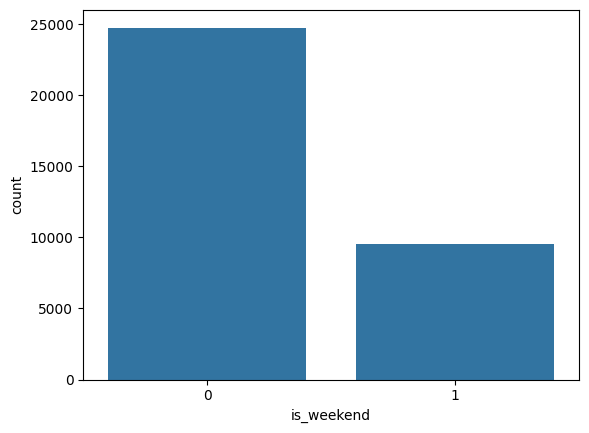

In [134]:
sns.countplot(x="is_weekend",data=df_travel_type2)
plt.show()

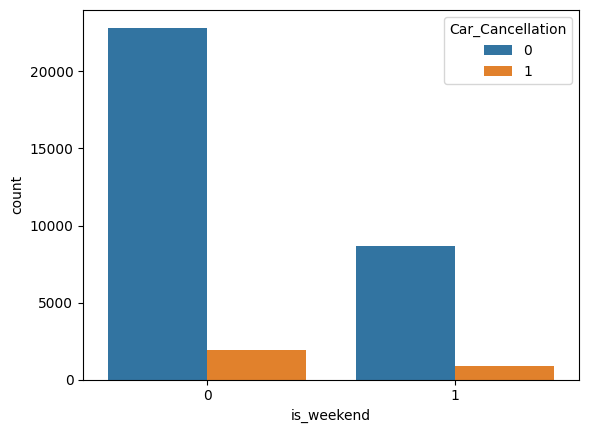

In [135]:
sns.countplot(x="is_weekend",hue="Car_Cancellation",data=df_travel_type2)
plt.show()

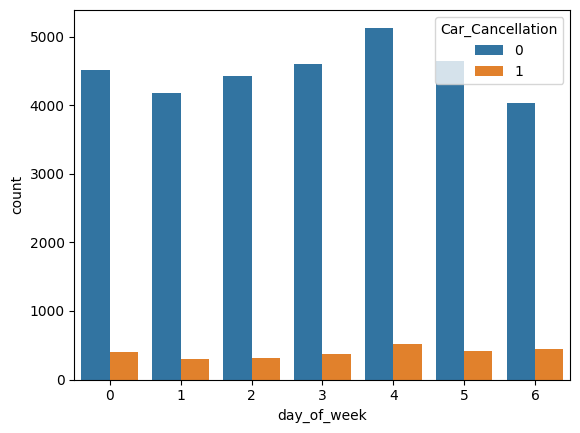

In [136]:
sns.countplot(x="day_of_week",hue="Car_Cancellation",data=df_travel_type2)
plt.show()

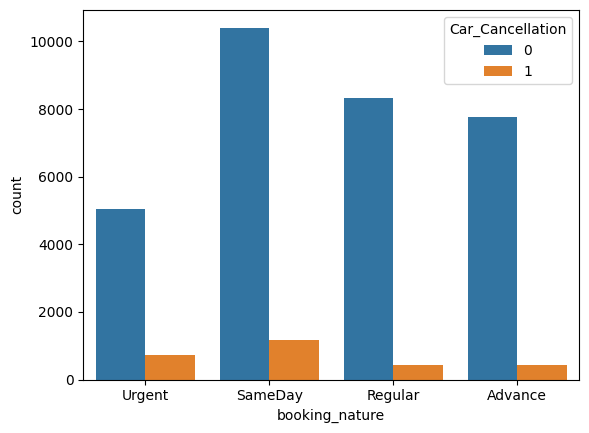

In [137]:
sns.countplot(x="booking_nature",hue="Car_Cancellation",data=df_travel_type2)
plt.show()

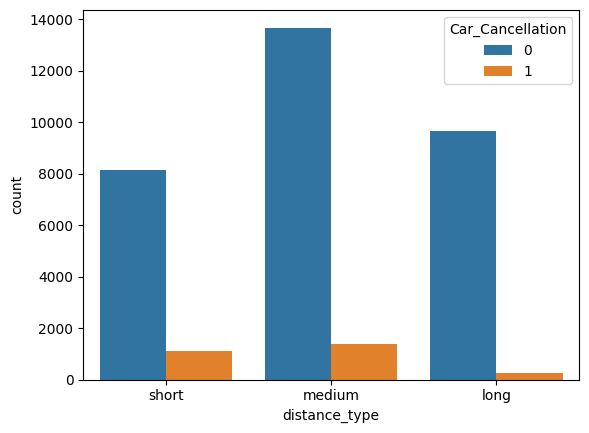

In [138]:
sns.countplot(x="distance_type",hue="Car_Cancellation",data=df_travel_type2)
plt.show()

In [139]:
df_travel_type2.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_vmid_12,route_cancel_Level,month,day_of_week,time_of_day,booking_nature,is_weekend,distance_type
0,0,0,0,0,Zero,1,1,Night,Urgent,0,short
1,0,0,0,1,Zero,1,1,Morning,SameDay,0,medium
2,0,0,0,1,Zero,1,1,Night,Urgent,0,medium
3,0,0,0,1,Zero,1,1,Night,Urgent,0,medium
4,0,0,0,1,Zero,1,1,Morning,Urgent,0,medium


In [140]:
#Encoding data 
df_travel_type2.route_cancel_Level=df_travel_type2.route_cancel_Level.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_travel_type2.booking_nature=df_travel_type2.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_travel_type2.time_of_day=df_travel_type2.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_travel_type2.distance_type=df_travel_type2.distance_type.map({"short":1,"medium":2,"long":3})
df_travel_type1.head()

,from_area_id_cancel_Level,from_city_route_cancel_Level,booking_nature,time_of_day,day_of_week,month,is_vmid_12,online_booking,mobile_site_booking,Car_Cancellation
6,2,2,1,1,1,1,1,0,0,0
17,1,2,4,1,5,1,0,1,0,0
24,1,2,4,1,5,1,0,0,0,0
158,1,1,3,1,4,1,0,1,0,0
216,1,2,4,1,6,1,0,1,0,0


In [141]:
df_travel_type2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   online_booking       34292 non-null  int64   
 1   mobile_site_booking  34292 non-null  int64   
 2   Car_Cancellation     34292 non-null  int64   
 3   is_vmid_12           34292 non-null  int32   
 4   route_cancel_Level   34292 non-null  int64   
 5   month                34292 non-null  int32   
 6   day_of_week          34292 non-null  int32   
 7   time_of_day          33792 non-null  category
 8   booking_nature       34292 non-null  category
 9   is_weekend           34292 non-null  int32   
 10  distance_type        34278 non-null  category
dtypes: category(3), int32(4), int64(4)
memory usage: 1.9 MB


<h2>Machine Learning</h2>

In [142]:
X2=df_travel_type2.drop('Car_Cancellation',axis=1)
y2=df_travel_type2["Car_Cancellation"]

In [143]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

<h3>Decision Tree Model</h3>

In [144]:
model2=DecisionTreeClassifier()

In [145]:
model2.fit(X2_train,y2_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


DecisionTreeClassifier()

In [146]:
y2train_pred=model2.predict(X2_train)
y2test_pred=model2.predict(X2_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [147]:
print(metrics.classification_report(y2_train,y2train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25282
           1       0.96      0.84      0.90      2151

    accuracy                           0.99     27433
   macro avg       0.97      0.92      0.95     27433
weighted avg       0.98      0.99      0.98     27433



In [148]:
print(metrics.classification_report(y2_test,y2test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6235
           1       0.75      0.65      0.70       624

    accuracy                           0.95      6859
   macro avg       0.86      0.81      0.83      6859
weighted avg       0.95      0.95      0.95      6859



<h3>Naive Bayes Classifier</h3>

In [149]:
nb_model2=GaussianNB()

In [150]:
nb_model2.fit(X2_train,y2_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


GaussianNB()

In [151]:
y2_train_pred=nb_model2.predict(X2_train)
y2_test_pred=nb_model2.predict(X2_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [152]:
print(metrics.classification_report(y2_train,y2_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.02      0.03     25282
           1       0.08      0.99      0.15      2151

    accuracy                           0.09     27433
   macro avg       0.52      0.50      0.09     27433
weighted avg       0.89      0.09      0.04     27433



In [153]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       315
           1       0.01      1.00      0.02         3

    accuracy                           0.05       318
   macro avg       0.50      0.52      0.05       318
weighted avg       0.99      0.05      0.07       318



<h3>Random Forest</h3>

In [154]:
RF_model2=RandomForestClassifier()

In [155]:
RF_model2.fit(X2_train,y2_train)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


RandomForestClassifier()

In [156]:
y2_train_predrf=RF_model2.predict(X2_train)
y2_test_predrf=RF_model2.predict(X2_test)

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [157]:
print(metrics.classification_report(y_train,y_train_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       0.84      0.89      0.86        18

    accuracy                           1.00      1271
   macro avg       0.92      0.94      0.93      1271
weighted avg       1.00      1.00      1.00      1271



In [158]:
print(metrics.classification_report(y_test,y_test_predrf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       0.00      0.00      0.00         3

    accuracy                           0.99       318
   macro avg       0.50      0.50      0.50       318
weighted avg       0.98      0.99      0.99       318



C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

<h1>CONCLUSION</h1>

<h2>For travel type ID 2 , we can choose to deploy Random forest  model , Since it is giving best results </h2>

<h3>Feature Engineering Travel Type Id 3</h3>

In [159]:
#Hourly Rental
df_travel_type3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,is_vmid_12
8,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0,1.0,0
20,2.0,3,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,0,0,1/1/2013 12:52,13.018540,77.635240,NaN,NaN,0,1.0,0
23,1.0,3,1286.0,NaN,NaN,NaN,1/1/2013 16:30,NaN,0,0,1/1/2013 14:39,12.973448,77.620320,NaN,NaN,0,1.0,1
34,1.0,3,1323.0,NaN,NaN,NaN,1/1/2013 20:00,41275.0,1,0,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0,1.0,1
47,2.0,3,142.0,NaN,NaN,NaN,1/2/2013 3:00,NaN,0,0,1/1/2013 19:37,12.912810,77.609230,NaN,NaN,0,1.0,1


In [160]:
df_travel_type3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           7550 non-null   float64
 1   travel_type_id       7550 non-null   int64  
 2   from_area_id         7550 non-null   float64
 3   to_area_id           0 non-null      float64
 4   from_city_id         448 non-null    float64
 5   to_city_id           0 non-null      float64
 6   from_date            7550 non-null   object 
 7   to_date              4930 non-null   float64
 8   online_booking       7550 non-null   int64  
 9   mobile_site_booking  7550 non-null   int64  
 10  booking_created      7550 non-null   object 
 11  from_lat             7550 non-null   float64
 12  from_long            7550 non-null   float64
 13  to_lat               0 non-null      float64
 14  to_long              0 non-null      float64
 15  Car_Cancellation     7550 non-null   int64

In [161]:
#Since it is hourly rental we dont want from_area_id ,to_area_id,from_city_id,to_city_id,from_lat,from_long ,to_lat,from_long,to_lat, to_long
#We dont want travel type id either because it is same value
df_travel_type3=df_travel_type3.drop(["travel_type_id","from_area_id","to_area_id","from_city_id","to_city_id","from_lat","from_long","to_lat","to_long","Cost_of_error"],axis=1)

In [162]:
df_travel_type3.head()

,package_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12
8,2.0,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,0,0
20,2.0,1/1/2013 14:30,NaN,0,0,1/1/2013 12:52,0,0
23,1.0,1/1/2013 16:30,NaN,0,0,1/1/2013 14:39,0,1
34,1.0,1/1/2013 20:00,41275.0,1,0,1/1/2013 17:25,0,1
47,2.0,1/2/2013 3:00,NaN,0,0,1/1/2013 19:37,0,1


In [163]:
#We dont need to_date 
df_travel_type3=df_travel_type3.drop("to_date",axis=1)

In [164]:
df_travel_type3.head(2)

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12
8,2.0,1/1/2013 16:00,0,0,1/1/2013 9:44,0,0
20,2.0,1/1/2013 14:30,0,0,1/1/2013 12:52,0,0


In [165]:
df_travel_type3.from_date=pd.to_datetime(df_travel_type3.from_date,format="mixed")

In [166]:
df_travel_type3["week_of_day"]=df_travel_type3.from_date.dt.dayofweek

In [167]:
df_travel_type3.head(2)

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1


In [168]:
df_travel_type3["is_weekend"]=(df_travel_type3["week_of_day"]>=5).astype('int')

In [169]:
df_travel_type3.head(2)

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1,0
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1,0


In [170]:
df_travel_type3["hour_of_day"]=df_travel_type3.from_date.dt.hour

In [171]:
df_travel_type3.head(2)

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1,0,16
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1,0,14


In [172]:
df_travel_type3["time_of_day"]=pd.cut(df_travel_type3['hour_of_day'],bins=[0,6,12,18,24],labels=["Night","Morning","Afternoon","Evening"])
df_travel_type3.head()            

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day,time_of_day
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1,0,16,Afternoon
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1,0,14,Afternoon
23,1.0,2013-01-01 16:30:00,0,0,1/1/2013 14:39,0,1,1,0,16,Afternoon
34,1.0,2013-01-01 20:00:00,1,0,1/1/2013 17:25,0,1,1,0,20,Evening
47,2.0,2013-01-02 03:00:00,0,0,1/1/2013 19:37,0,1,2,0,3,Night


In [173]:
df_travel_type3["month"]=df_travel_type3.from_date.dt.month

In [174]:
df_travel_type3.head(2)  

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day,time_of_day,month
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1,0,16,Afternoon,1
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1,0,14,Afternoon,1


In [175]:
df_travel_type3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   from_date            7550 non-null   datetime64[ns]
 2   online_booking       7550 non-null   int64         
 3   mobile_site_booking  7550 non-null   int64         
 4   booking_created      7550 non-null   object        
 5   Car_Cancellation     7550 non-null   int64         
 6   is_vmid_12           7550 non-null   int32         
 7   week_of_day          7550 non-null   int32         
 8   is_weekend           7550 non-null   int32         
 9   hour_of_day          7550 non-null   int32         
 10  time_of_day          7516 non-null   category      
 11  month                7550 non-null   int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(5), int64(3), object(1)
memory usage: 567

In [176]:
df_travel_type3.isnull().sum()

package_id              0
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
Car_Cancellation        0
is_vmid_12              0
week_of_day             0
is_weekend              0
hour_of_day             0
time_of_day            34
month                   0
dtype: int64

In [177]:
df_travel_type3['time_of_day'].describe()

count        7516
unique          4
top       Morning
freq         4046
Name: time_of_day, dtype: object

In [178]:
#filling null values with most frequent values 1
df_travel_type3['time_of_day']=df_travel_type3['time_of_day'].fillna("Morning")

In [179]:
df_travel_type3.isnull().sum()

package_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_vmid_12             0
week_of_day            0
is_weekend             0
hour_of_day            0
time_of_day            0
month                  0
dtype: int64

In [180]:
df_travel_type3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day,time_of_day,month
8,2.0,2013-01-01 16:00:00,0,0,1/1/2013 9:44,0,0,1,0,16,Afternoon,1
20,2.0,2013-01-01 14:30:00,0,0,1/1/2013 12:52,0,0,1,0,14,Afternoon,1
23,1.0,2013-01-01 16:30:00,0,0,1/1/2013 14:39,0,1,1,0,16,Afternoon,1
34,1.0,2013-01-01 20:00:00,1,0,1/1/2013 17:25,0,1,1,0,20,Evening,1
47,2.0,2013-01-02 03:00:00,0,0,1/1/2013 19:37,0,1,2,0,3,Night,1


In [181]:
df_travel_type3.booking_created=pd.to_datetime(df_travel_type3.booking_created,format="mixed")

In [182]:
df_travel_type3['time_diff']=(df_travel_type3.from_date-df_travel_type3.booking_created).dt.total_seconds()/3600
df_travel_type3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day,time_of_day,month,time_diff
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,1,0,16,Afternoon,1,6.266667
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,1,0,14,Afternoon,1,1.633333
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,0,16,Afternoon,1,1.850000
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,1,0,20,Evening,1,2.583333
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,2,0,3,Night,1,7.383333


In [183]:
df_travel_type3['time_diff'].describe()

count    7550.000000
mean       14.570344
std        39.198073
min        -3.550000
25%         1.920833
50%         5.858333
75%        13.766667
max       695.550000
Name: time_diff, dtype: float64

In [184]:
df_travel_type3['booking_nature']=pd.cut(df_travel_type3['time_diff'],bins=[-4,2,4,14,700 ],labels=["Urgent","SameDay","Regular","Advance"])
df_travel_type3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,hour_of_day,time_of_day,month,time_diff,booking_nature
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,1,0,16,Afternoon,1,6.266667,Regular
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,1,0,14,Afternoon,1,1.633333,Urgent
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,0,16,Afternoon,1,1.850000,Urgent
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,1,0,20,Evening,1,2.583333,SameDay
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,2,0,3,Night,1,7.383333,Regular


In [185]:
#We dont need from-date ,booking_created ,hour_of_day	
df_travel_type3=df_travel_type3.drop(["from_date","booking_created","hour_of_day","time_diff"],axis=1)
df_travel_type3.head(2)

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_vmid_12,week_of_day,is_weekend,time_of_day,month,booking_nature
8,2.0,0,0,0,0,1,0,Afternoon,1,Regular
20,2.0,0,0,0,0,1,0,Afternoon,1,Urgent


In [186]:
df_travel_type3=df_travel_type3[["package_id","online_booking","mobile_site_booking","is_vmid_12","week_of_day","is_weekend","time_of_day","month","booking_nature","Car_Cancellation"]]

In [187]:
df_travel_type3.head(2)

,package_id,online_booking,mobile_site_booking,is_vmid_12,week_of_day,is_weekend,time_of_day,month,booking_nature,Car_Cancellation
8,2.0,0,0,0,1,0,Afternoon,1,Regular,0
20,2.0,0,0,0,1,0,Afternoon,1,Urgent,0


In [188]:
df_travel_type3.booking_nature=df_travel_type3.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_travel_type3.time_of_day=df_travel_type3.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_travel_type3.head()

,package_id,online_booking,mobile_site_booking,is_vmid_12,week_of_day,is_weekend,time_of_day,month,booking_nature,Car_Cancellation
8,2.0,0,0,0,1,0,2,1,3,0
20,2.0,0,0,0,1,0,2,1,1,0
23,1.0,0,0,1,1,0,2,1,1,0
34,1.0,1,0,1,1,0,3,1,2,0
47,2.0,0,0,1,2,0,4,1,3,0


In [189]:
df_travel_type3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   package_id           7550 non-null   float64 
 1   online_booking       7550 non-null   int64   
 2   mobile_site_booking  7550 non-null   int64   
 3   is_vmid_12           7550 non-null   int32   
 4   week_of_day          7550 non-null   int32   
 5   is_weekend           7550 non-null   int32   
 6   time_of_day          7550 non-null   category
 7   month                7550 non-null   int32   
 8   booking_nature       7550 non-null   category
 9   Car_Cancellation     7550 non-null   int64   
dtypes: category(2), float64(1), int32(4), int64(3)
memory usage: 428.0 KB


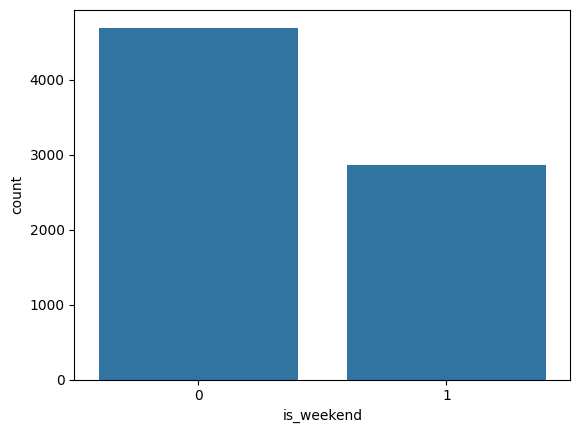

In [190]:
sns.countplot(x="is_weekend",data=df_travel_type3)
plt.show()

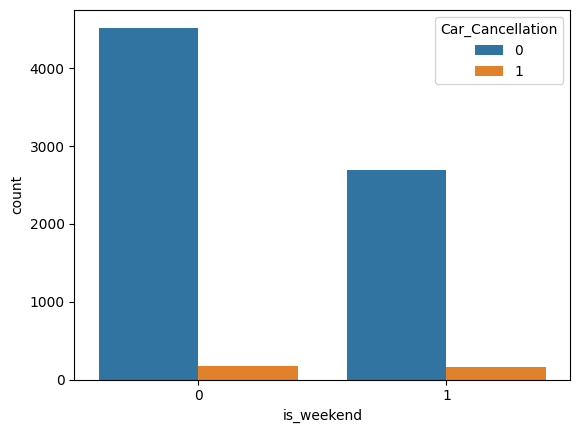

In [191]:
sns.countplot(x="is_weekend",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

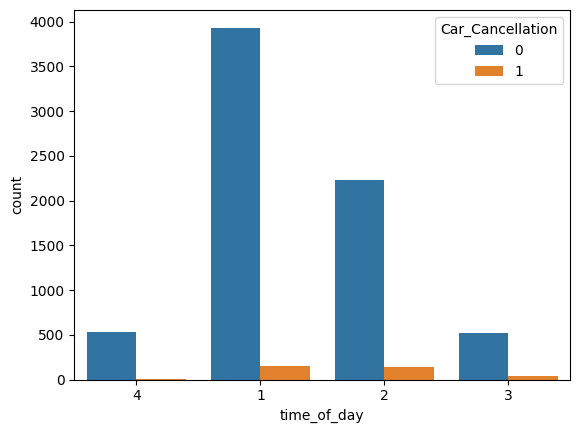

In [192]:
sns.countplot(x="time_of_day",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

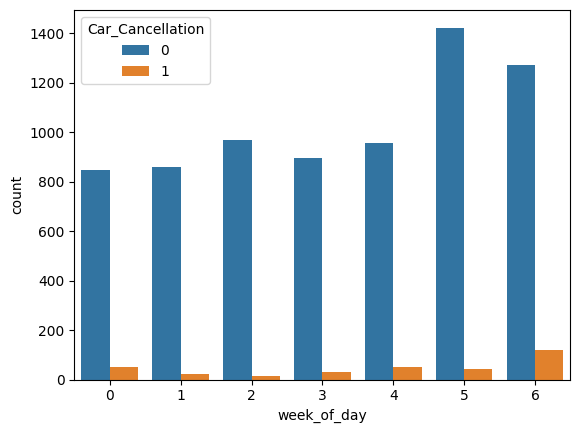

In [193]:
sns.countplot(x="week_of_day",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

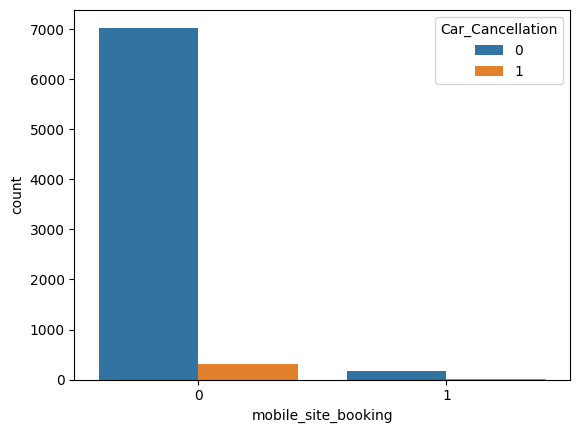

In [194]:
sns.countplot(x="mobile_site_booking",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

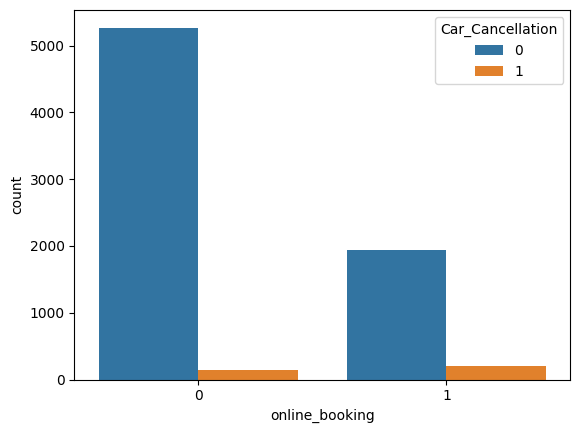

In [195]:
sns.countplot(x="online_booking",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

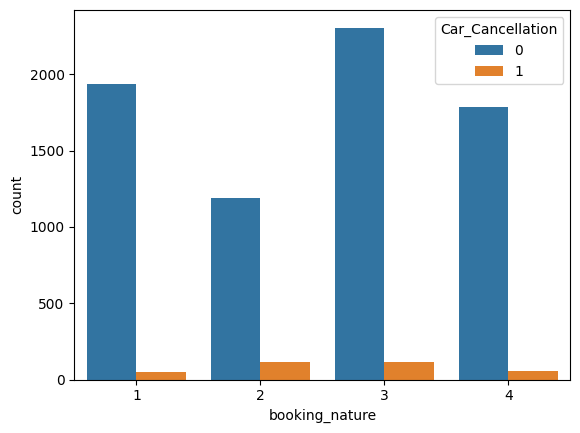

In [196]:
sns.countplot(x="booking_nature",hue="Car_Cancellation",data=df_travel_type3)
plt.show()

<h2>Machine Learning</h2>

In [197]:
X3=df_travel_type3.drop('Car_Cancellation',axis=1)
y3=df_travel_type3['Car_Cancellation']

In [198]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2)

<h3>Decision Tree Model</h3>

In [199]:
model3=DecisionTreeClassifier()

In [200]:
model3.fit(X3_train,y3_train)

DecisionTreeClassifier()

In [201]:
ytrain_pred3=model3.predict(X3_train)
ytest_pred3=model3.predict(X3_test)

In [202]:
print(metrics.classification_report(y3_train,ytrain_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5763
           1       0.91      0.54      0.68       277

    accuracy                           0.98      6040
   macro avg       0.95      0.77      0.83      6040
weighted avg       0.98      0.98      0.97      6040



In [203]:
print(metrics.classification_report(y3_test,ytest_pred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1451
           1       0.26      0.22      0.24        59

    accuracy                           0.95      1510
   macro avg       0.61      0.60      0.61      1510
weighted avg       0.94      0.95      0.94      1510



<h2>Naive Bayes Classifier</h2>

In [204]:
nb_model3=GaussianNB()

In [205]:
nb_model3.fit(X3_train,y3_train)

GaussianNB()

In [207]:
y3_train_pred=nb_model3.predict(X3_train)
y3_test_pred=nb_model3.predict(X3_test)

In [208]:
print(metrics.classification_report(y3_train,y3_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5763
           1       0.14      0.12      0.13       277

    accuracy                           0.93      6040
   macro avg       0.55      0.54      0.54      6040
weighted avg       0.92      0.93      0.92      6040



In [209]:
print(metrics.classification_report(y3_test,y3_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1451
           1       0.10      0.10      0.10        59

    accuracy                           0.93      1510
   macro avg       0.53      0.53      0.53      1510
weighted avg       0.93      0.93      0.93      1510



<h2>Random Forest</h2>

In [210]:
RF_model3=RandomForestClassifier()

In [211]:
RF_model3.fit(X3_train,y3_train)

RandomForestClassifier()

In [212]:
y3_train_predrf=RF_model3.predict(X3_train)
y3_test_predrf=RF_model3.predict(X3_test)

In [213]:
print(metrics.classification_report(y3_train,y3_train_predrf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5763
           1       0.83      0.61      0.70       277

    accuracy                           0.98      6040
   macro avg       0.91      0.80      0.85      6040
weighted avg       0.97      0.98      0.97      6040



In [214]:
print(metrics.classification_report(y3_test,y3_test_predrf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1451
           1       0.35      0.24      0.28        59

    accuracy                           0.95      1510
   macro avg       0.66      0.61      0.63      1510
weighted avg       0.95      0.95      0.95      1510



<h2>CONCLUSION</h2>

<h3>For travel type ID 3 , we can choose to deploy decision tree model , Since it is giving same results and less complex to store and understand</h3>